In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [233]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,BatchNormalization,LeakyReLU
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [249]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

# **Reading Data**

In [220]:
x_train=[]
y_train=[]
img_size=150
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    fp=os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in tqdm(os.listdir(fp)):
        img=cv2.imread(os.path.join(fp,j))
        img=cv2.resize(img,(img_size,img_size))
        x_train.append(img)
        y_train.append(i)
for i in labels:
    fp=os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    for j in tqdm(os.listdir(fp)):
        img=cv2.imread(os.path.join(fp,j))
        img=cv2.resize(img,(img_size,img_size))
        x_train.append(img)
        y_train.append(i)
x_train=np.array(x_train)
y_train=np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 132.10it/s]


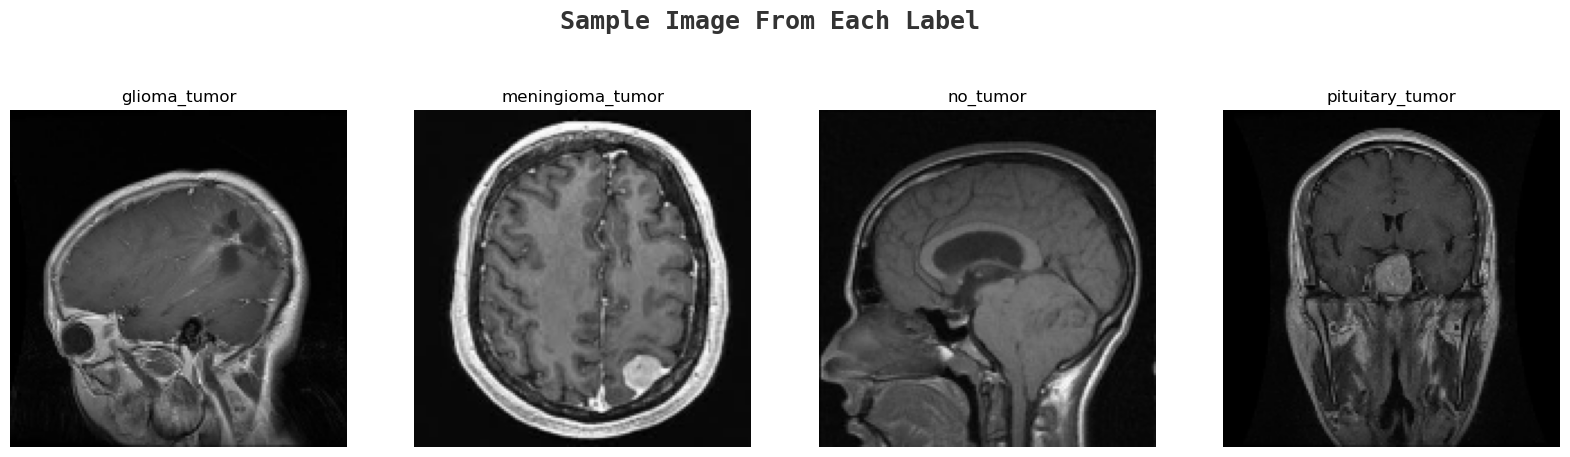

In [224]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(x_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1


In [225]:
x_train,y_train=shuffle(x_train,y_train,random_state=101)
x_train.shape

(3264, 150, 150, 3)

In [226]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.1,random_state=101)

In [227]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [228]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(64,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [229]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_168 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 conv2d_169 (Conv2D)         (None, 146, 146, 32)      9248      
                                                                 
 batch_normalization_83 (Bat  (None, 146, 146, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 dropout_83 (Dropout)        (None, 73, 73, 32)        0         
                                                                 
 conv2d_170 (Conv2D)         (None, 71, 71, 64)      

In [230]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [231]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),validation_split=0.2,batch_size=32)

Epoch 1/20


2023-07-22 12:36:53.879898: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_23/dropout_83/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


92/92 [==============================] - 10s 89ms/step - loss: 1.3529 - accuracy: 0.5243 - val_loss: 1.1052 - val_accuracy: 0.4281
Epoch 2/20
92/92 [==============================] - 8s 85ms/step - loss: 0.9535 - accuracy: 0.6493 - val_loss: 0.8844 - val_accuracy: 0.6972
Epoch 3/20
92/92 [==============================] - 8s 85ms/step - loss: 0.7947 - accuracy: 0.7048 - val_loss: 1.0561 - val_accuracy: 0.5841
Epoch 4/20
92/92 [==============================] - 8s 86ms/step - loss: 0.7032 - accuracy: 0.7412 - val_loss: 1.0008 - val_accuracy: 0.6330
Epoch 5/20
92/92 [==============================] - 8s 87ms/step - loss: 0.6089 - accuracy: 0.7797 - val_loss: 0.8369 - val_accuracy: 0.6972
Epoch 6/20
92/92 [==============================] - 8s 86ms/step - loss: 0.5631 - accuracy: 0.7835 - val_loss: 0.7194 - val_accuracy: 0.7615
Epoch 7/20
92/92 [==============================] - 8s 87ms/step - loss: 0.4540 - accuracy: 0.8376 - val_loss: 0.5581 - val_accuracy: 0.8165
Epoch 8/20
92/92 [=====

# **Visualization**

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

11/11 [==============================] - 0s 19ms/step


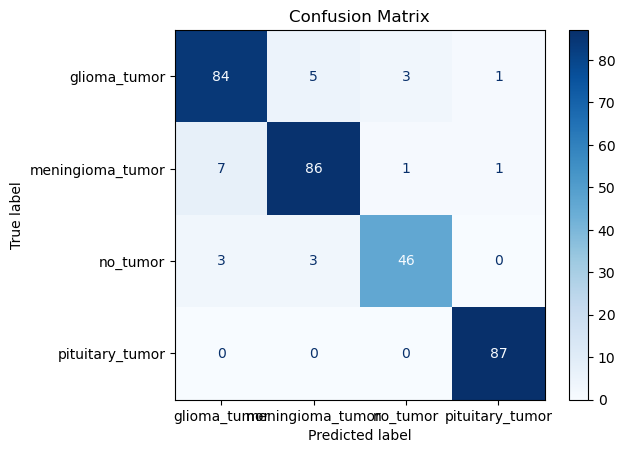

Modelin Doğruluk Oranı: 0.926605504587156
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        93
           1       0.91      0.91      0.91        95
           2       0.92      0.88      0.90        52
           3       0.98      1.00      0.99        87

    accuracy                           0.93       327
   macro avg       0.93      0.92      0.92       327
weighted avg       0.93      0.93      0.93       327



In [235]:
y_pred = np.argmax(model.predict(x_test),axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)  

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)  
print("Modelin Doğruluk Oranı:", accuracy)
print(classification_report(np.argmax(y_test, axis=1),y_pred))





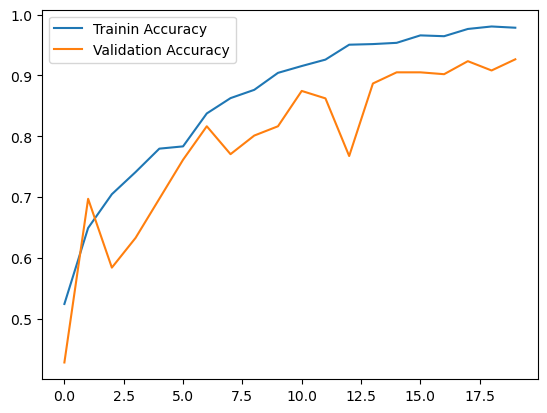

In [236]:
#model.save(braintumor.h5)
plt.plot(history.history['accuracy'],label="Trainin Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.legend()
plt.show()

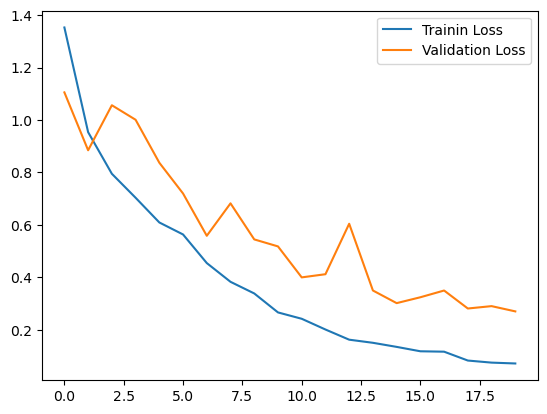

In [237]:
plt.plot(history.history['loss'],label="Trainin Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.legend()
plt.show()

# **Prediction**

In [212]:
img=cv2.imread("/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m (102).jpg")
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img.shape

(150, 150, 3)

In [213]:
img_array=img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

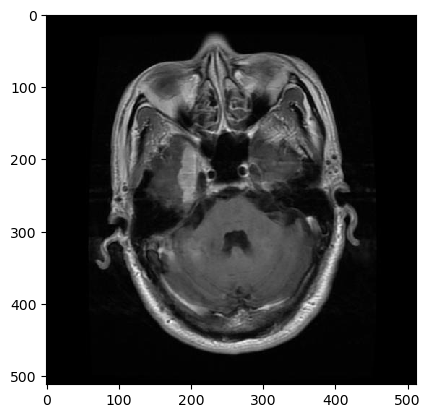

In [214]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m (102).jpg')
plt.imshow(img,interpolation='nearest')
plt.show

In [239]:
a=model.predict(img_array)
indices=a.argmax()
labels[indices]

1/1 [==============================] - 0s 22ms/step


'meningioma_tumor'